In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
data = pd.read_csv("../574_m5_datasets_v3.0/HollywoodMovies.csv")
data.head()

Movie   LeadStudio  RottenTomatoes  \
0                               Spider-Man 3         Sony            61.0   
1                            Shrek the Third    Paramount            42.0   
2                               Transformers    Paramount            57.0   
3   Pirates of the Caribbean: At World's End       Disney            45.0   
4  Harry Potter and the Order of the Phoenix  Warner Bros            78.0   

   AudienceScore          Story      Genre  TheatersOpenWeek  OpeningWeekend  \
0           54.0  Metamorphosis     Action            4252.0           151.1   
1           57.0          Quest  Animation            4122.0           121.6   
2           89.0  Monster Force     Action            4011.0            70.5   
3           74.0         Rescue     Action            4362.0           114.7   
4           82.0          Quest  Adventure            4285.0            77.1   

   BOAvgOpenWeekend  DomesticGross  ForeignGross  WorldGross  Budget  \
0           35540.0         336.53        554.34      890.87   258.0   
1           29507.0         322.72        476.24      798.96   160.0   
2           17577.0         319.25        390.46      709.71   150.0   
3           26302.0         309.42        654.00      963.42   300.0   
4           17998.0         292.00        647.88      939.89   150.0   

   Profitability  OpenProfit  Year  
0         345.30       58.57  2007  
1         499.35       76.00  2007  
2         473.14       47.00  2007  
3         321.14       38.23  2007  
4         626.59       51.40  2007

### "Find the highest rated movie in the“Quest” story type"

In [9]:
data[["Story"]]

Story
0    Metamorphosis
1            Quest
2    Monster Force
3           Rescue
4            Quest
..             ...
965            NaN
966            NaN
967            NaN
968            NaN
969            NaN

[970 rows x 1 columns]

In [12]:
QuestStoryType =  data.groupby("Story").get_group("Quest")

In [19]:
SortedQuestStoryType = QuestStoryType.sort_values("RottenTomatoes", ascending=False)

In [49]:
val = SortedQuestStoryType[["Movie", "RottenTomatoes"]].head(1)

'The Hurt Locker'

In [92]:
print("1. highest rated movie in the 'Quest' story type is ", np.array(val).tolist()[0][0],  "which is", np.array(val).tolist()[0][1])

1. highest rated movie in the 'Quest' story type is  The Hurt Locker which is 97.0


### Find the genre in which there has been the greatest number of movie releases

In [154]:
data.head()

Movie   LeadStudio  RottenTomatoes  \
0                               Spider-Man 3         Sony            61.0   
1                            Shrek the Third    Paramount            42.0   
2                               Transformers    Paramount            57.0   
3   Pirates of the Caribbean: At World's End       Disney            45.0   
4  Harry Potter and the Order of the Phoenix  Warner Bros            78.0   

   AudienceScore          Story      Genre  TheatersOpenWeek  OpeningWeekend  \
0           54.0  Metamorphosis     Action            4252.0           151.1   
1           57.0          Quest  Animation            4122.0           121.6   
2           89.0  Monster Force     Action            4011.0            70.5   
3           74.0         Rescue     Action            4362.0           114.7   
4           82.0          Quest  Adventure            4285.0            77.1   

   BOAvgOpenWeekend  DomesticGross  ForeignGross  WorldGross  Budget  \
0           35540.0         336.53        554.34      890.87   258.0   
1           29507.0         322.72        476.24      798.96   160.0   
2           17577.0         319.25        390.46      709.71   150.0   
3           26302.0         309.42        654.00      963.42   300.0   
4           17998.0         292.00        647.88      939.89   150.0   

   Profitability  OpenProfit  Year  
0         345.30       58.57  2007  
1         499.35       76.00  2007  
2         473.14       47.00  2007  
3         321.14       38.23  2007  
4         626.59       51.40  2007

In [143]:
groupedData = data.groupby("Genre")

In [152]:
sortted = groupedData.size().sort_values(ascending=False)
print("genre in which there has been the greatest number of movie releases : ", pd.DataFrame(sortted).index[0])

genre in which there has been the greatest number of movie releases :  Comedy


### Print the names of the top five movies with the costliest budgets

In [170]:
budgetFilter= data[["Movie", "Budget"]]
budgetFilter

Movie  Budget
0                                 Spider-Man 3   258.0
1                              Shrek the Third   160.0
2                                 Transformers   150.0
3     Pirates of the Caribbean: At World's End   300.0
4    Harry Potter and the Order of the Phoenix   150.0
..                                         ...     ...
965                                The Canyons     NaN
966                                   The Call    13.0
967                        The English Teacher     NaN
968                       John Dies at the End     1.0
969                                   Lovelace    10.0

[970 rows x 2 columns]

In [187]:
budgetFilter = budgetFilter.sort_values("Budget", ascending=False)
budgetFilter.head(5)

Movie  Budget
3      Pirates of the Caribbean: At World's End   300.0
468                                     Tangled   260.0
0                                  Spider-Man 3   258.0
586  Pirates of the Caribbean:On Stranger Tides   250.0
710                                 John Carter   250.0

### Is there any correspondence between the critics’ evaluation of a movie and itsacceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

In [243]:
corr = data[["Movie", "RottenTomatoes", "Profitability"]]
x = corr.isna().sum()
corr = corr.fillna(0)
x = corr.isna().sum()
x
for index, row in corr.iterrows():
    print(row["Movie"],"  ",row["RottenTomatoes"], "  ",row["Profitability"])

Spider-Man 3    61.0    345.3
Shrek the Third    42.0    499.35
Transformers    57.0    473.14
Pirates of the Caribbean: At World's End    45.0    321.14
Harry Potter and the Order of the Phoenix    78.0    626.59
I Am Legend    69.0    390.23
The Bourne Ultimatum    93.0    402.57
National Treasure: Book of Secrets    31.0    351.82
Alvin and the Chipmunks    26.0    516.19
300    60.0    701.64
Ratatouille    97.0    415.81
The Simpsons Movie    90.0    702.76
Wild Hogs    14.0    281.8
Knocked Up    91.0    663.86
Juno    94.0    3085.48
Rush Hour 3    20.0    184.3
Live Free or Die Hard    79.0    348.66
Fantastic Four: Rise of the Silver Surfer    35.0    222.34
American Gangster    79.0    266.46
Enchanted    93.0    400.57
Bee Movie    52.0    191.73
Superbad    88.0    849.36
I Now Pronounce You Chuck and Larry    13.0    218.91
Hairspray    92.0    270.06
Blades of Glory    69.0    238.87
Ocean's 13    70.0    366.25
Ghost Rider    28.0    207.94
Evan Almighty    23.0    99.1


Funny People    68.0    95.44
My Bloody Valentine 3-D    57.0    719.49
Old Dogs    5.0    276.43
Land of the Lost    26.0    68.77
My Sister's Keeper    47.0    348.05
Underworld: Rise of the Lycans    30.0    261.0
Confessions of a Shopaholic    24.0    155.0
The Lovely Bones    32.0    143.86
Year One    14.0    103.92
The Unborn    11.0    478.19
Planet 51    22.0    150.91
Drag Me to Hell    92.0    302.67
Orphan    55.0    255.64
Duplicity    64.0    130.23
Surrogates    39.0    153.04
Ninja Assassin    25.0    123.18
Invictus    75.0    203.72
State of Play    84.0    147.0
Notorious    50.0    221.8
The Pink Panther 2    12.0    128.71
All About Steve    6.0    267.47
Halloween II    20.0    262.73
The Informant!    78.0    189.82
The Men Who Stare at Goats    52.0    275.76
(500) Days of Summer    87.0    809.6
Push    22.0    128.55
9    57.0    161.37
The Soloist    56.0    63.85
Did You Hear About the Morgans?    12.0    147.03
The Stepfather    12.0    156.0
The Uninvited 

The Hangover Part III    19.0    351.46
Now You See Me    50.0    468.97
The Great Gatsby    49.0    334.32
The Smurfs 2    14.0    331.0
The Conjuring    86.0    1590.0
A Good Day to Die Hard    14.0    331.15
Oblivion    53.0    238.47
Elysium    68.0    248.82
Turbo    67.0    209.31
We're the Millers    47.0    729.71
Epic    64.0    268.43
The Lone Ranger    31.0    121.16
Cloudy with a Chance of Meatballs 2    70.0    330.48
The Heat    66.0    534.72
Hansel & Gretel    15.0    451.41
Planes    26.0    439.58
White House Down    50.0    136.91
Percy Jackson: Sea of Monsters    40.0    222.05
Jack the Giant Slayer    52.0    101.38
The Wolf of Wall Street    77.0    175.61
Identity Thief    19.0    497.04
The Secret Life of Walter Mitty    48.0    187.83
Lee Daniels' The Butler    73.0    559.03
Anchorman 2    75.0    331.01
American Hustle    93.0    406.0
Insidious Chapter 2    37.0    3230.06
Olympus Has Fallen    48.0    230.04
Bad Grandpa    61.0    993.35
Mama    66.0    976

In [240]:
xaxis = corr["RottenTomatoes"].get_values()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [241]:
yaxis = corr["Profitability"].get_values()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'RottenTomatoes vs Profitability')

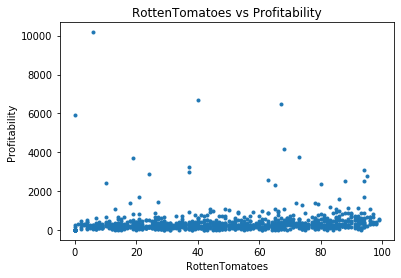

In [246]:
plt.plot(xaxis,yaxis , ".")
plt.xlabel("RottenTomatoes")
plt.ylabel("Profitability")
plt.title("RottenTomatoes vs Profitability")

In [252]:
corr.sort_values("Profitability", ascending=False)

Movie  RottenTomatoes  Profitability
779       The Devil Inside             6.0       10175.85
172              Fireproof            40.0        6694.40
562              Insidious            67.0        6467.27
445  Paranormal Activity 2             0.0        5917.03
584  Paranormal Activity 3            68.0        4140.78
..                     ...             ...            ...
794   The Raid: Redemption             0.0           0.00
795           The Sessions             0.0           0.00
706       Jab Tak Hai Jaan             0.0           0.00
747            Ruby Sparks             0.0           0.00
725                 Marley             0.0           0.00

[970 rows x 3 columns]